Distribution functions and statistical data modeling
================================

## Modules import

In [1]:
import numpy as np
import openturns as ot
from openturns.viewer import View
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# 1. Random variables
## Definitions

A random variable is an application :

\begin{align}
    X : \left |
    \begin{array}{llc}
        \Omega & \rightarrow & \mathbb X \\
        \omega & \mapsto & x = X (\omega)
    \end{array}
    \right .
\end{align}


- We call <font color='red'>discrete random variable</font>, a variable that can only take a finite or countable number of values:

    \begin{equation}
        \mathbb X \subseteq \mathbb Z
    \end{equation}
    
    Examples: sum of two dice, number of goals in a match

- We call <font color='red'>variable aléatoire continue</font>, a variable that can take all real values ​​over a given interval:

    \begin{equation}
        \mathbb X \subseteq \mathbb R
    \end{equation}

    Examples: temperature variation in an oven, power of a motor

### Probability density function (PDF)
Function that associates to $x$ the probability that the random variable
is less than or equal to $x$ :

\begin{equation}
    F_X (x) = \mathbb P [X \leq x]
\end{equation}

### Cumulative Density Function (CFD)
- In <font color='red'>discrete case</font>, is the function that associates to $x$ the probability that the random variable is <font color='red'>exactly equal</font> to $x$ :

    \begin{equation}
        p_X (x) = \mathbb P [X = x]
    \end{equation}

- In <font color='red'>continuous case</font>, is the function that associates t $x$ the probability that the random variable is <font color='red'>in an  infinitesimal neighborhood </font> of $x$ :

    \begin{equation}
        f_X (x) dx = \mathbb P [x < X \leq x + dx]
    \end{equation}

    It is also the <font color='red'>derivative of the distribution function</font> :
    \begin{equation}
        f_X (x) = \frac{dF_X (x)}{dx}
    \end{equation}

In [2]:
# Discrete random variable with binomial distribution
existence_a0 = ot.Binomial() 
existence_a0.setDescription(['Binomiale'])

# Continuous random variable with normal distribution
drag = ot.Normal(0,1) # 
drag.setDescription(['Normale'])


C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation\lib\site-packages\openturns\viewer.py:559: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show(**kwargs)


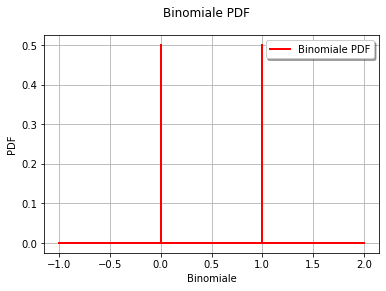

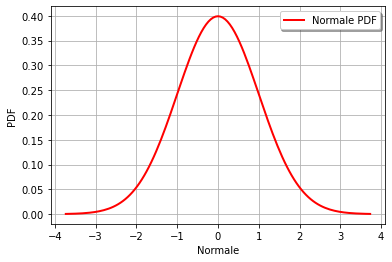

In [3]:
# Plot of densities
View(existence_a0.drawPDF()).show()
View(drag.drawPDF()).show()

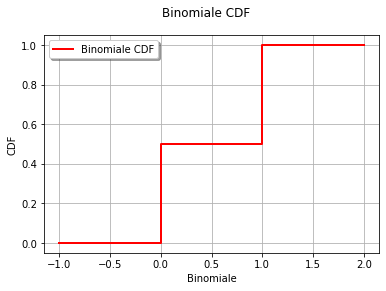

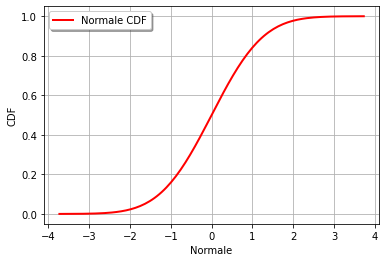

In [4]:
# Plot of Cumulative functions
View(existence_a0.drawCDF()).show()
View(drag.drawCDF()).show()

### Mathematical Hope
To define the statistical moments, we introduce the operator
“hope” noted $\mathbb E$ and which applies to a random variable (under
certain conditions).

- Case of <font color='red'>discrete random variables</font> :

\begin{equation}
   \mathbb E [X] = \sum_{x_i} x_i p_X (x_i)
\end{equation}

- Case of <font color='red'>continuous random variables</font> :

\begin{equation}
   \mathbb E [X] = \int_{x \in \mathbb X} x f_X (x) dx
\end{equation}

### Statistical moment of order 1 (mean)
The <font color='red'>mean</font>  is the first central tendency indicator, it summarizes the<font color='red'>localisation</font>  of the probability distribution, it is defined as follows:

\begin{equation}
   \mu_X = \mathbb E [X]
\end{equation}

### Statistical moment of order 2 (standard deviation)
The <font color='red'>standard deviation (std)</font>  is the second central tendency indicator, it summarizes the <font color='red'>variability</font>  of the probability distribution, it is defined as follows (if it exists):

\begin{equation}
   \sigma_X^2 = Var [X] = \mathbb E \left[ (X - \mu_X)^2 \right]
\end{equation}


In [5]:
drag.getMean()

class=Point name=Unnamed dimension=1 values=[0]

In [7]:
# Continuous variable
print ('Mean : {}'.format(drag.getMean()[0]))
print ('Std : {}'.format(drag.getStandardDeviation()[0]))
print ('Variance : {}'.format(np.sqrt(drag.getStandardDeviation()[0])))

Mean : 0.0
Std : 1.0
Variance : 1.0


In [9]:
# Discrete variable
print ('Mean : {}'.format(existence_a0.getMean()[0]))
print ('Std : {}'.format(existence_a0.getStandardDeviation()[0]))
print ('Variance : {}'.format(np.sqrt(existence_a0.getStandardDeviation()[0])))

Mean : 0.5
Std : 0.5
Variance : 0.7071067811865476


### Quantiles (or fractiles)
The <font color='red'>quantile at probability level $\alpha$, noted $x_\alpha$</font> is calculated by inverse reading of
the distribution function (strictly increasing):

\begin{equation}
   F_X (x_\alpha) = \alpha \Rightarrow x_\alpha = F_X^{-1} (\alpha), 0 \leq \alpha \leq 1
\end{equation}

We therefore define the <font color='red'>quantile function</font> as <font color='red'>inverse distribution function</font>. The <font color='red'>median</font> is the 50% quantile. The <font color='red'>first</font> (resp. <font color='red'>third</font>) <font color='red'>quartile</font> is the
quantile at 25 % (resp. 75 %).

### Confidence intervals
To summarize the variability of a random variable, one can use a
confidence interval. It is bounded by <font color='red'>two quantiles centered on the
median</font>.
The<font color='red'>confidence interval at the probability level $1 – \alpha$</font> is defined as:

\begin{equation}
   \left[ x_{\alpha / 2} ; x_{1 - \alpha / 2}\right] = \left[ F_X^{-1} (\alpha/2) ; F_X^{-1} (1 - \alpha/2) \right], 0 \leq \alpha \leq 1
\end{equation}


In [11]:
# Continuous variable
print ('First quartile : {}'.format(drag.computeQuantile(0.25)[0]))
print ('Second quartile (médiane) : {}'.format(drag.computeQuantile(0.5)[0]))
print ('Third quartile : {}'.format(drag.computeQuantile(0.75)[0]))

alpha = 0.05
print ('Confidence interval at {} % : [{} ; {}]'.format((1-alpha)*100,
        drag.computeQuantile(alpha/2)[0], drag.computeQuantile(1-alpha/2)[0]))

First quartile : -0.6744897501960817
Second quartile (médiane) : 0.0
Third quartile : 0.6744897501960817
Confidence interval at 95.0 % : [-1.959963984540054 ; 1.9599639845400538]
